# Task 2: Customer Segmentation Using Unsupervised Learning


<img src='https://visitskane.com/sites/default/files/images/list-items/2016-11/Melodifestival_Malmo_2013_foto_Fredrik_Johansson.jpg' height="600" width="1000" align="center">

---

### 👨‍💻 **Author: Abdul Samad**

- 🔗 **LinkedIn:**  
  [https://www.linkedin.com/in/abdulsamad577/](https://www.linkedin.com/in/abdulsamad577/)

- 🧠 **Kaggle Profile:**  
  [https://www.kaggle.com/samad0015](https://www.kaggle.com/samad0015)

- 💻 **GitHub Repository:**  
  [https://github.com/abdulsamad577/Internship_tasks](https://github.com/abdulsamad577/Internship_tasks)

---


## Problem Statement and Objective

The goal of this project is to perform **customer segmentation** using unsupervised machine learning techniques. We are provided with a transactional dataset containing details of customer purchases such as age, gender, quantity, price, shopping mall, and more.

Since there is no target variable (label), we will use **K-Means clustering** to group similar customers based on their spending behavior and shopping patterns.

## Objective:

- Analyze customer purchase behavior through exploratory data analysis (EDA).
- Create meaningful features per customer from transactional data.
- Apply **K-Means Clustering** to segment customers into distinct groups.
- Use **PCA or t-SNE** to visualize these clusters.
- Suggest relevant **marketing strategies** for each identified segment based on data insights.

This project helps businesses understand their customer base better and personalize marketing efforts for each segment to improve customer retention and sales.


## Import the Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## Dataset Description and Loading

This dataset contains mall customer transaction records including:

- Customer demographic info (age, gender)
- Purchase details (quantity, price)
- Transaction info (invoice number, date, mall, category, payment method)

We will process this data to understand customer behavior and perform clustering.

### Load the Data


In [3]:
df=pd.read_csv('customer_shopping_data.csv')
df.head()

,invoice_no,customer_id,gender,age,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,C241288,Female,28,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,C111565,Male,21,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,C266599,Male,20,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,C988172,Female,66,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,C189076,Female,53,Books,4,60.60,Cash,24/10/2021,Kanyon


## Exploratory Data Analysis (EDA)

Let’s explore the distribution of key features and check for missing values.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99457 entries, 0 to 99456
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   invoice_no      99457 non-null  object 
 1   customer_id     99457 non-null  object 
 2   gender          99457 non-null  object 
 3   age             99457 non-null  int64  
 4   category        99457 non-null  object 
 5   quantity        99457 non-null  int64  
 6   price           99457 non-null  float64
 7   payment_method  99457 non-null  object 
 8   invoice_date    99457 non-null  object 
 9   shopping_mall   99457 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 7.6+ MB


In [5]:
df.describe()

,age,quantity,price
count,99457.000000,99457.000000,99457.000000
mean,43.427089,3.003429,689.256321
std,14.990054,1.413025,941.184567
min,18.000000,1.000000,5.230000
25%,30.000000,2.000000,45.450000
50%,43.000000,3.000000,203.300000
75%,56.000000,4.000000,1200.320000
max,69.000000,5.000000,5250.000000


In [6]:
df.shape

(99457, 10)

In [7]:
df.isnull().sum()

invoice_no        0
customer_id       0
gender            0
age               0
category          0
quantity          0
price             0
payment_method    0
invoice_date      0
shopping_mall     0
dtype: int64

In [8]:
df.duplicated().sum()

0

### Age Distribution

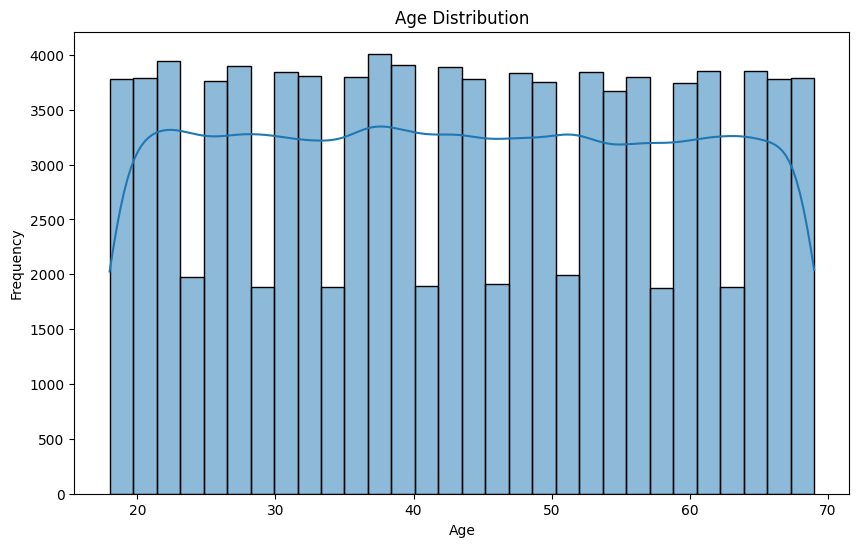

In [9]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Category Distibution

C:\Users\Sami\AppData\Local\Temp\ipykernel_11204\1178433075.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


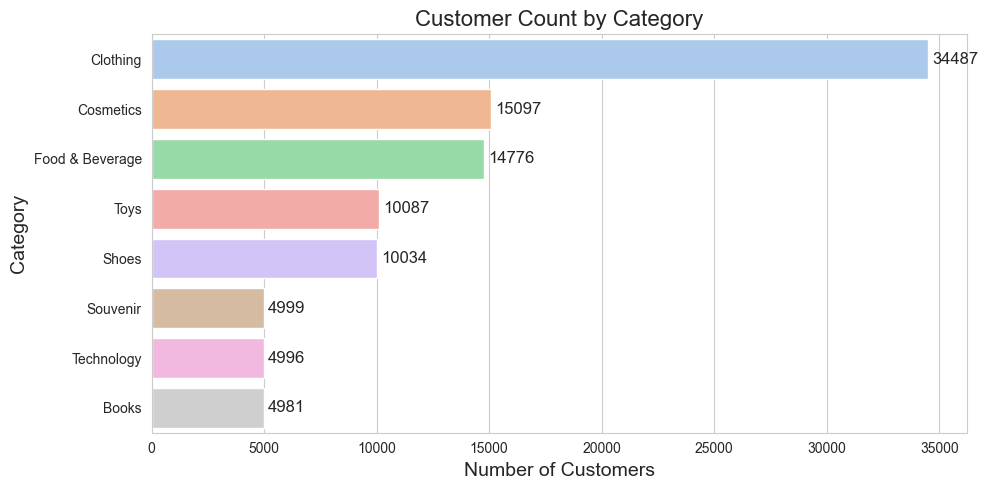

In [10]:
# Use seaborn style
sns.set_style("whitegrid")

# Get category counts as DataFrame (required for seaborn)
category_counts = df['category'].value_counts().reset_index()
category_counts.columns = ['Category', 'Count']

# Set figure size
plt.figure(figsize=(10, 5))

# Create seaborn barplot
ax = sns.barplot(
    data=category_counts,
    y='Category',
    x='Count',
    palette='pastel'
)

# Add value labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt='%.0f', label_type='edge', padding=3, fontsize=12)

# Titles and labels
plt.title("Customer Count by Category", fontsize=16)
plt.ylabel("Category", fontsize=14)
plt.xlabel("Number of Customers", fontsize=14)

# Rotate x-axis labels if needed
# plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


### Price Distribution by Category

C:\Users\Sami\AppData\Local\Temp\ipykernel_11204\949111454.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='category', y='price', palette='husl')


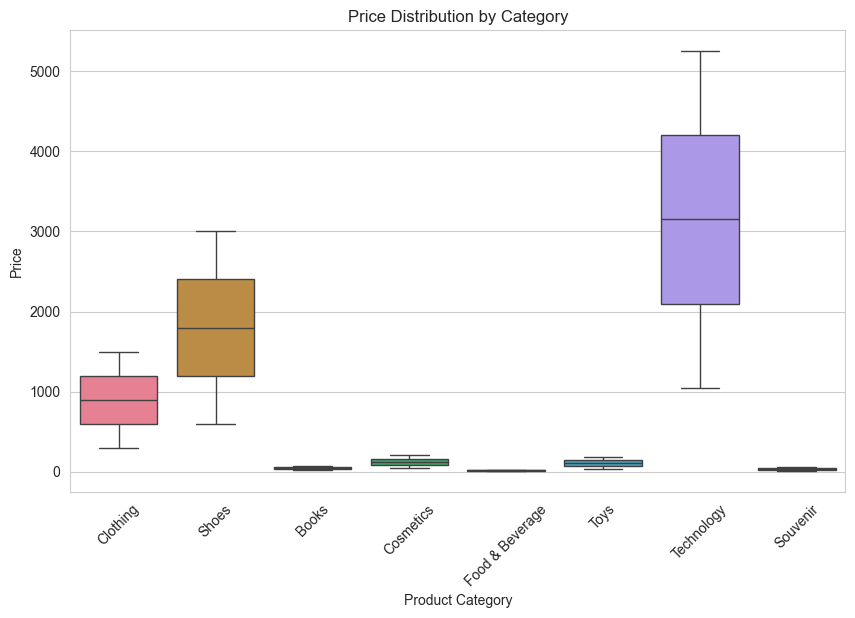

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='category', y='price', palette='husl')
plt.title('Price Distribution by Category')
plt.xlabel('Product Category')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


### Payment Method Distribution

C:\Users\Sami\AppData\Local\Temp\ipykernel_11204\1324935862.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='payment_method', palette='pastel')


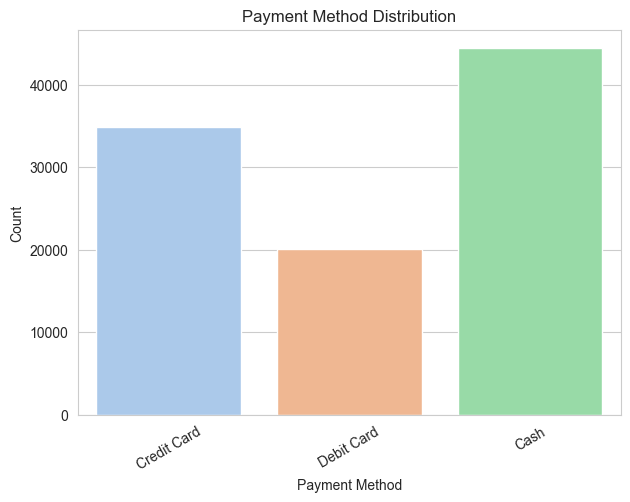

In [12]:
plt.figure(figsize=(7,5))
sns.countplot(data=df, x='payment_method', palette='pastel')
plt.title('Payment Method Distribution')
plt.xlabel('Payment Method')
plt.ylabel('Count')
plt.xticks(rotation=30)
plt.show()


### Payment Method Distribution

C:\Users\Sami\AppData\Local\Temp\ipykernel_11204\1763095248.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_malls.index, x=top_malls.values, palette='viridis')


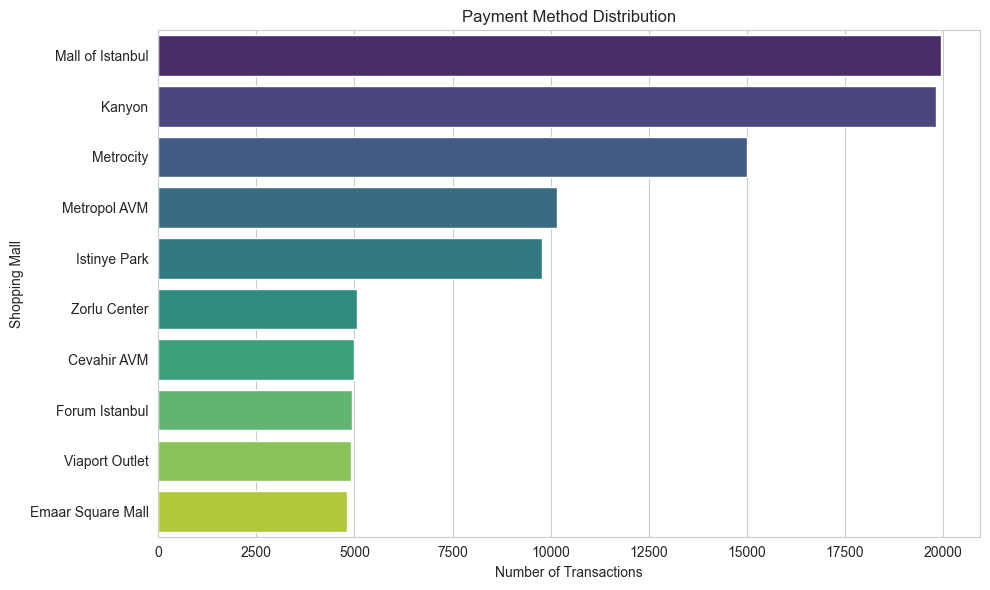

In [13]:
top_malls = df['shopping_mall'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_malls.index, x=top_malls.values, palette='viridis')
plt.title('Payment Method Distribution')
plt.ylabel('Shopping Mall')
plt.xlabel('Number of Transactions')
plt.tight_layout()
plt.show()


## Data Preprocessing

In [14]:
df['invoice_date'] = pd.to_datetime(df['invoice_date'], format='%d/%m/%Y')

# Create total amount spent per transaction
df['total_amount'] = df['quantity'] * df['price']


In [15]:
customer_df = df.groupby('customer_id').agg({
    'gender': 'first',
    'age': 'mean',
    'quantity': 'sum',
    'total_amount': 'sum',
    'invoice_no': 'nunique',
    'category': 'nunique',
    'payment_method': 'nunique',
    'shopping_mall': 'nunique'
}).reset_index()


In [16]:
customer_df

,customer_id,gender,age,quantity,total_amount,invoice_no,category,payment_method,shopping_mall
0,C100004,Male,61.0,5,7502.00,1,1,1,1
1,C100005,Male,34.0,2,2400.68,1,1,1,1
2,C100006,Male,44.0,3,322.56,1,1,1,1
3,C100012,Male,25.0,5,130.75,1,1,1,1
4,C100019,Female,21.0,1,35.84,1,1,1,1
...,...,...,...,...,...,...,...,...,...
99452,C999886,Male,61.0,3,47.07,1,1,1,1
99453,C999910,Male,41.0,3,136.35,1,1,1,1
99454,C999974,Female,29.0,5,7502.00,1,1,1,1
99455,C999976,Female,49.0,3,322.56,1,1,1,1


In [17]:
customer_df['gender'] = customer_df['gender'].map({'Male': 0, 'Female': 1})


In [18]:
features = customer_df[['gender', 'age', 'quantity', 'total_amount',
                        'invoice_no', 'category', 'payment_method', 'shopping_mall']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


## Optimal Number of Clusters (Elbow Method)

We use the Elbow Method to decide how many clusters are optimal by plotting inertia values.


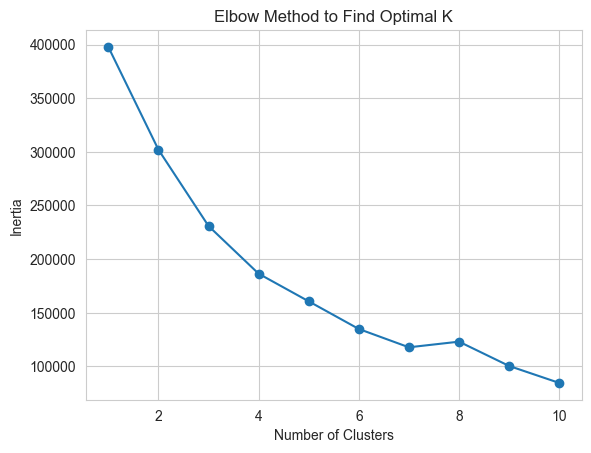

In [19]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method to Find Optimal K')
plt.show()


## Apply K-Means Clustering

Let’s apply KMeans with the selected number of clusters (e.g., 5 based on Elbow Method).


In [20]:
kmeans = KMeans(n_clusters=5, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_features)


## PCA Visualization of Customer Segments

c:\Users\Sami\miniconda3\envs\AI\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


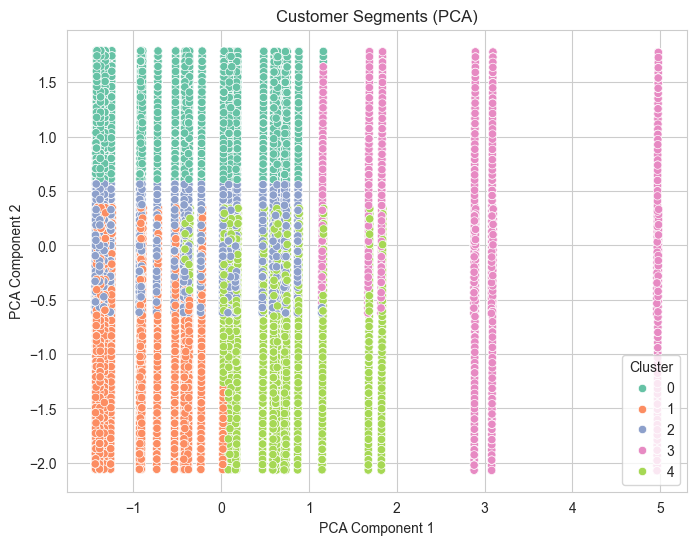

In [21]:
from sklearn.decomposition import PCA

# Apply PCA to scaled features
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Plot PCA result
plt.figure(figsize=(8, 6))
sns.scatterplot(x=pca_result[:, 0], y=pca_result[:, 1],
                hue=customer_df['Cluster'], palette='Set2')
plt.title("Customer Segments (PCA)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()


## Visualize Clusters with T-SNE

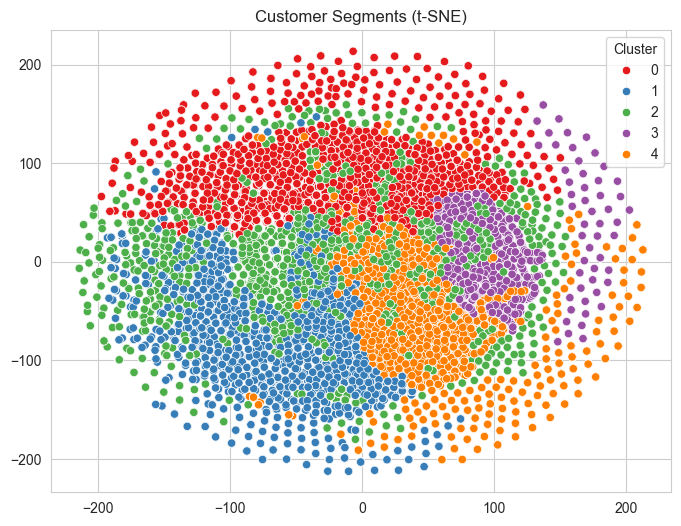

In [22]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=tsne_result[:, 0], y=tsne_result[:, 1], hue=customer_df['Cluster'], palette='Set1')
plt.title("Customer Segments (t-SNE)")
plt.show()


In [23]:
customer_df.groupby('Cluster')[['age', 'quantity', 'total_amount']].mean()

,age,quantity,total_amount
Cluster,,,
0,56.489572,2.727308,1147.207831
1,41.310819,1.782498,615.736628
2,30.584437,2.746942,1144.579412
3,43.400344,4.669668,12231.770268
4,45.561115,4.132055,3195.035149


## Customer Segment Marketing Strategies



**Cluster 0 — Premium Customers**
- High spenders, loyal
- Strategy: VIP programs, early access, premium support



**Cluster 1 — Budget Shoppers**
- Medium spend, frequent visits
- Strategy: Discounts, value bundles, referral rewards



**Cluster 2 — Infrequent Buyers**
- Low activity and spend
- Strategy: Re-engagement offers, flash sales



**Cluster 3 — Variety Seekers**
- Explore multiple categories
- Strategy: Personalized recommendations, new arrivals



**Cluster 4 — Conservative Shoppers**
- Consistent, cautious buyers
- Strategy: Quality assurance, simple deals, trust-building


## Conclusion

In this project, we successfully performed **customer segmentation** using **unsupervised learning (K-Means)** on a transactional dataset. After transforming the data into customer-level insights, we identified distinct customer groups based on spending habits, quantity purchased, and shopping patterns.

We used both **PCA** and **t-SNE** for visualizing the clusters, and observed well-separated segments. Finally, we proposed **targeted marketing strategies** for each customer group to help businesses personalize their outreach and improve customer satisfaction.

This type of segmentation can empower businesses to:
- Improve marketing ROI
- Boost customer loyalty
- Launch data-driven campaigns

Overall, this project demonstrates how **machine learning and data analysis** can help drive better business decisions and customer engagement.

---